# Introduction 


##### Dans cette analyse sur les fims réalisé, nous allons essayer de repondre a des questions importante sur des films a travers le dataset TMDb movie data

#### Ce dataset nous permettra de repondre aux questions suivantes

  ## 1--**Le film qui a coûté le plus cher a la production**
  
  ## 2--**Le film qui a rapporté  le plus de benefice sur toutes les periodes**
   
   ## 3--**Y a t-il un film qui n'a pas aporte de benefice?**
   
   ## 4--**Quel est le  film le plus populaire sur toutes les periodes** 
   
   ## 5--**Quelle est la relation entre la popularite du films et ses votes en d'autres termes les                 films les plus populaires  sont t-il ceux qui sont mieux notés?**
   
   ## 6--**En quelle aneee il y a eu plus de films realises**
   
   ## 7-- **En quelle Année il ya eu plus de befice réalisé ?**
  
  
   
   ### Nous allons donc commencer par traiter le dataset ensuite l'explorer et enfin creer des visualisation pour repondre aux questions
   
   #### Commencons par importer tous les packages nécessaires  a l'analyse
   

In [1]:
#import des packages neccessaires pour notre analyse
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Chargement du dataset avec la fonction read_csv de pandas 
df = pd.read_csv('tmdb-movies.csv')


## Traitement des données 


#### Dans cette partie nous allons traiter les donnees pour les rendre utilisable pour l'exploration

In [4]:
# Visualisation des 5 premieres lignes du dataset pour voir son contenu
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# Voyons voir avec le nombre de lignes et de collonnes que comporte ce dataset
df.shape

(10866, 21)

In [6]:
list(df.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

Le Dataset comporte **10866** linges et **21** collones qui representent les varibles sur lesquelles nous allons travailler 
Mais pour notre analyse nous allons utilser les **variables** qui nous interessent pour repondre aux questions :
ce sont:
1. id	                                   = un numero d'identification du film                                                                                                            
2. popularity                         = la popularité  du film
3. budget	                           =  le budget pour la production du film
4. revenue	                          = le revenue genere par le film
5. original_title                      = le titre du film
6. cast	                                 = le nom du directeur de casting
7. runtime                             =  la durée  du film
8. genres	                           = le genre du film
9. production_companies     = la compagnie  de production 
10. vote_count	                    = le nombre de vote
11. vote_average	              = le nombre moyen des votes
12. release_year                   =  la date de realisation à      
13. director                            = le nom du directeur de production 

**NB** : toutes ces varibles ne seront tous pas utilisé  dans cette analyse, nous les gardons pour poursuivre et poser encore plus de question pour trouver des reponses 


### Pour la suite  Nous supprimerons les variables qui ne nous interessent pas et ensuite nous allons determiner les types des variables

In [9]:
# suppression des collones non neccessaire pour l'analyse
df.drop(["imdb_id" ,"homepage","budget_adj","revenue_adj","overview","tagline","release_date","keywords"], axis=1, inplace = True) 
## Verification de la supresseion
df.head()

KeyError: "['imdb_id', 'homepage', 'budget_adj', 'revenue_adj', 'overview', 'tagline', 'release_date', 'keywords'] not found in axis"

In [10]:
# visaualisons des informations sur le datset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1.1+ MB


In [11]:
# les types de donnees
df.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

### Nous constatons que les differents types des variables nous conviennent  bien pour notre analyse nous avons donc pas a changer de type de varible.

Maitenant voyons  voir si le dataset contient des valeurs manquantes et des valeurs dupliqués et ensuite les traiter éventuellement 

In [12]:
#Trairons les valleurs nulles
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [13]:
#fonction pour traiter les valeurs manquantes
def replace_na(df,ft):
    return df[ft].fillna(df[ft].mean, inplace=True)

In [12]:
#Remplissement des valeurs nulles de la colonne cast
replace_na(df,'cast')

In [13]:
#Remplissement des valeurs nulles de la colonne director
replace_na(df,'director')

In [14]:
#Remplissement des valeurs nulles de la colonne production_companies
replace_na(df,'production_companies')

In [15]:
#Remplissement des valeurs nulles de la colonne genres
replace_na(df,'genres')

In [16]:
#verification 
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [17]:
#Voir les valeurs dupliquées
df.duplicated().sum()


1

In [18]:
#Spression de la ligne dupliquée 
df.drop_duplicates(inplace=True)

In [19]:
#verification de la supression
df.duplicated().sum()

0

#### - Nous avons constater des valeurs manquantes dans quatres colones du dataset et nous les avons traité  en les remplaçant  pour leur  moyenne

#### - Aussi nous avons constaté  qu'il y une ligne qui ete dupliqué  et nous l'avons supprimé 
  
 **nous allons voir quelques information statistiques  sur le dataset**


In [20]:
# statistique  descriptive sur le dataset
df.describe() 

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [21]:
 # revisualisation du shape du datset apres le traitement 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   cast                  10865 non-null  object 
 6   director              10865 non-null  object 
 7   runtime               10865 non-null  int64  
 8   genres                10865 non-null  object 
 9   production_companies  10865 non-null  object 
 10  vote_count            10865 non-null  int64  
 11  vote_average          10865 non-null  float64
 12  release_year          10865 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1.2+ MB


#### Ici on constate quelques informations  
- une popularité  moyenne et maximale  qui sont respectivement  de **0.646446** et de **32.985763**
- les films durent en moyenne **102.071790**min 
etc...

**Nous avons fini le traitement  des donnees.
   Nous avons desormais un datset prêt  pour l'exploration avec **10865** lignes et **13** collonnes

# Exploration des données 


### Nous allons essayer de repondre auyx questions posé  en debut de cette analyse 

In [22]:
##Visualisation des premieres lignes 
df.head(5)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


## 1- Quel est le film qui a coûté le plus cher a la production

In [23]:
#le film qui a coute plus chere pour la realisation
df[df['budget'] == df['budget'].max()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
2244,46528,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,74,6.4,2010


# 2- quel est le film qui a rapporté le plus de benefice sur toutes les periodes ?

pour repondre a cette question nous allons creer uine nouvelle collonne **profit** qui prendra les valeurs de la difference entre la colonne revenue et du budget et qui represent le benefice realise sur chaque film

In [24]:
#Calcul du benefice sur chaque film
df['profit'] = df['revenue'] - df['budget']

In [25]:
#Le film qui a aporte le plus de benefice
df[df['profit'] == df['profit'].max()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009,2544505847


## 3-Y a t-il un film qui n'a pas aporte de benefice?

In [26]:
# Les films dont le benefice est inférieur  ou égal  au budget
df[df['profit'] <=0]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit
48,265208,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,481,5.3,2015,-30000000
57,210860,2.575711,60000000,30418560,Mortdecai,Johnny Depp|Gwyneth Paltrow|Ewan McGregor|Paul...,David Koepp,106,Comedy|Adventure,Lionsgate|Mad Chance|OddLot Entertainment|Huay...,696,5.3,2015,-29581440
59,201088,2.550747,70000000,17752940,Blackhat,Chris Hemsworth|Leehom Wang|Tang Wei|Viola Dav...,Michael Mann,133,Mystery|Crime|Action|Thriller|Drama,Universal Pictures|Forward Pass|Legendary Pict...,584,5.0,2015,-52247060
66,205775,2.345821,100000000,93820758,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,Ron Howard,122,Thriller|Drama|Adventure|Action|History,Imagine Entertainment|Spring Creek Productions...,805,6.4,2015,-6179242
67,334074,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,280,5.4,2015,-20000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,11,7.4,1966,0
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,1966,0
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,11,6.5,1966,0
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,22,5.4,1966,0


## 4- Quel est le film le plus populaire sur toutes les periodes ?

In [27]:
# Le film le plus populaire
df[df['popularity'] == df.popularity.max()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1363528810


## 5- Quelle est la relation entre la popularite du films et ses votes en d'autres termes les films les plus populaires sont t-il ceux qui sont mieux notés?

<AxesSubplot:title={'center':'Relation entre le vote et la popularite'}, xlabel='Popularité ', ylabel='Nombre de votes'>

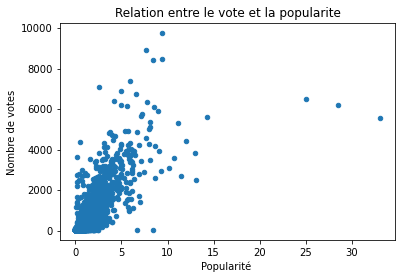

In [28]:

#le film le plus populaire est-il le plus voté 
df.plot(x='popularity',y='vote_count',kind='scatter',xlabel='Popularité ',ylabel='Nombre de votes',title='Relation entre le vote et la popularite')

ce graphe en nuage de point met en evidence la realtion entre la popularité  des films et leur nombre de votes recu.
On peut donc remarqué 90% des films ont une note en dessous des 4000 votes. il montre egalement que la plus grosse popularité est d'environ 33 mais n'a pas recu le plus grand nombre de vote qui est d'environ 10000 

In [29]:
#le budget et revenu moyen 
df.budget.mean(), df.revenue.mean()

(14624286.06433502, 39826896.07685228)


   ## 6- En quelle aneee il y a eu plusieurs films realise

In [30]:
#determination de film réalisé  par année 
df.groupby('release_year')['id'].nunique()

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

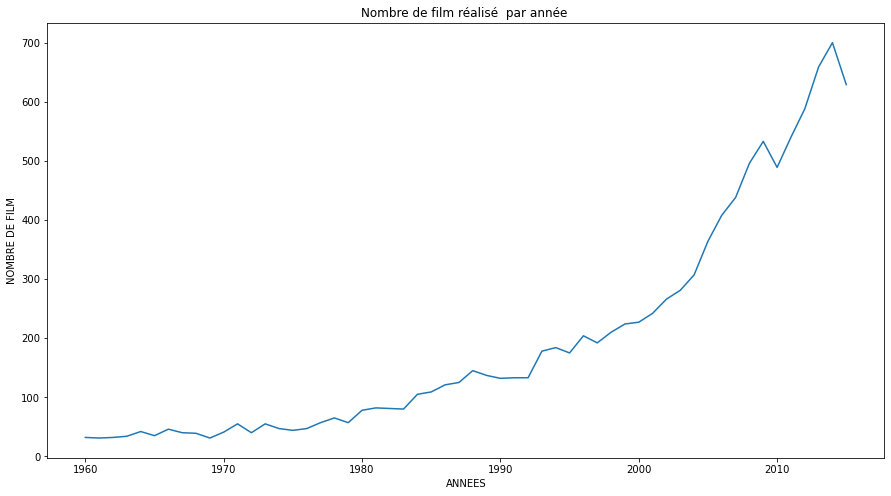

In [34]:
#Axe des abscisse
years = range(1960,2016)
#taille de la figure
plt.figure(figsize=(15,8))
#type de visuel
plt.plot(years ,df.groupby('release_year')['id'].nunique())
#Titre de la figure
plt.title('Nombre de film réalisé  par année ')
# Etiquette pour l'axe x
plt.xlabel("ANNEES")
# Etiquette pour l'axe y
plt.ylabel('NOMBRE DE FILM')
#Affichage de la figure 
plt.show

ce graphe presente le nombre de films réalisé  par année  dabns tout le dataset. on remarque une evolution croissante sur l'ensemble des années.
trois tendance sont a remarquer une premiere qui part de 1960 a 1979 ou on remarque une croissance  assez lente ,une deuxieme qui part de 1980 a 2000 avec une croissance  assez rapide avec une baisse en 1994. enfin une 3e avec une forte croissance tres forte de 2001 a 2015. on remarque principalement  deux chuttes dans cette periodes, une premiere de 2010 et la deuxième  pour la dernière  année  en l'occurence 2015.

l'année  2014 est donc l'année  avec le plus grand nombre de films réalisés  qui est de 700.

## 7- En quelle année  il y a eu plus de Bénéfice  réalisé?

In [32]:
# les benefices realises par Anee
df.groupby('release_year')['profit'].sum()

release_year
1960      122948052
1961      291583188
1962      160857720
1963      114073489
1964      301498621
1965      387876739
1966       27181889
1967      637182437
1968      192793980
1969      201827989
1970      433255023
1971      328913610
1972      458450917
1973     1158790319
1974      735569818
1975      901210966
1976      678855600
1977     2019003159
1978     1160782648
1979     1429980913
1980     1406162387
1981     1400848450
1982     2020648850
1983     1788421908
1984     1906312454
1985     2127051755
1986     2298244668
1987     2752649036
1988     2814202845
1989     4085267358
1990     4025244594
1991     3240366796
1992     4636387847
1993     5175522514
1994     4866222145
1995     6290456783
1996     4624450228
1997     5904086559
1998     4993514938
1999     5590477473
2000     5226001012
2001     7768139139
2002     8748978273
2003     8898385848
2004     9623482396
2005     9173550759
2006     8969554085
2007    11776099666
2008    11650432541
2009   

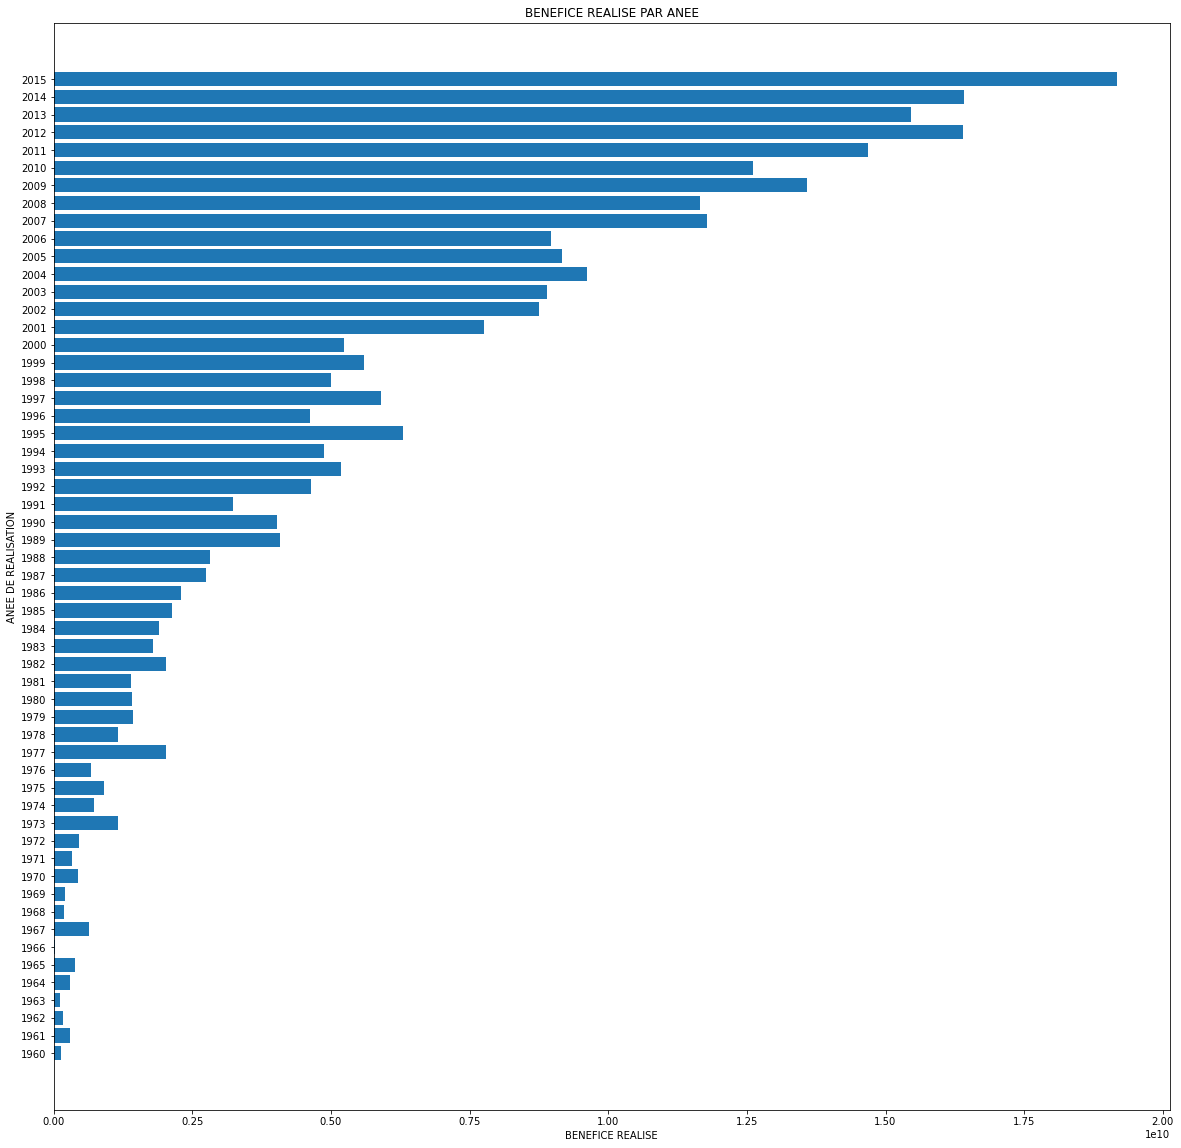

In [33]:
# visualisation en fonction des années 

#Axe des ordonnées
years = range(1960,2016)
#taille de la figure
plt.figure(figsize=(20,20))
#type de visuel
plt.barh(years,df.groupby('release_year')['profit'].sum())
plt.yticks(years)
#Titre de la figure
plt.title("BENEFICE REALISE PAR ANEE")
# Etiquette pour l'axe y
plt.ylabel("ANEE DE REALISATION")
# Etiquette pour l'axe x
plt.xlabel('BENEFICE REALISE')
#Affichage de la figure 
plt.show()

**Ce graphique presente le benefice realise par année dans tout le dataset .
on peut remarquer une augmentation constante dans l'ensemble sur toutes les periodes.Cependant on peux scender en plusieurs etapes: de 1960 a 1982, on remarque une augmentation lente en dent de sci,Ensuite de 1983 a 2000 ou l'augmentation est assez rapide mais toujours avec certaines assez en légère  baisse et enfin de 2001 a 2015 ou l'augmentation  est rapide** 

**Dans cette analyse nous avons crée  3 visuels.
Le premier en nuage de point qui permet de visualite la relation entre le popularite et le nombre de vote des films.
le deuxieme en courbe pour voir l' evolution du nombre de films réalisés  au fil des annees 
et le 3 en bar horizontal qui permet de visualiser le benefice réalisé pour chque annee** 

## Ceci marque la fin de notre analyse. cependant il y a encore plusieurs  questions auquelles nous pouvons repondre a travers ce dataset. c'est donc ce que je compte faire.

Mais pour l'instant apres l'exploration il nous faut tirer des conclusions pour la suite.

# Conclusion

### Apres notre analyse nous pouvons tirer les  première  conclusins suivantes :

                 👉** Le film qui a coute plus cher pour la realisation est **The Warrior's Way** réalisé  en **2010** avec un budget de **425000000**. 
                          Il a recu un nombre de vote de **74** avec une note de  popularite de 0.25054, on peut dire que ce film n'a pas connu un grand succès .

                 👉 ** Avec un note de popularite de 32.985763 le film du titre qui a nécessité 150000000 pour sa realisation, 
                          Jurassic World est le plus populaire    de 1960 a 2015 

                 👉 Avatar est le titre du  film qui a aporte le plus de benefice  2544505847 $. Ce film a ete réalisé en  2009 et a été  vote 8458 fois

                 👉 L'analyse a montré  egalemnt que plus de 70% des films ont eu des revenu inférieur  ou égale au budget 
                       de realisation. par conséquent  ils n'ont produire aucun benefice. 

                 👉 La visualaisation de la relation entre le nombre de vote et la popularite des fims montre que 
                      le film le plus vote n'a pas la meilleure note de popularite 

                 👉 avec 700 film realise l'année  2014 est l'année  ou il a eu plus de film réalisé. 
                 
                 👉 2015 est donc l'anee qui a produit plus de benefice avec 19165902961 $ 
                 
# Les limitations:

### J'ai bien sur été  confronte a des difficultés majeures suivantes :
 - **l'utilisation de numpy : en effet j'ai eu beacoup de mal a utiliser numpy pourtant je vois bien qu'il peut etre utiliser pour ameliorer notre annalyse**
 - **Asez de mal a interpreter les visuesls pour produire une bonne conclusion**
 - **Plusieurs autres questions que j'avais prevu auquelles  je n'ai pas été  capable de repondre avec le Dataset**
 - **Fonction pour le tracage des visuels Le probleme a ce niveau est que j'utilise des données  regroupes par une categorie comme dataset et a ce niveau ca ne fonctyionne pas.**
 **Sinon en utilisant ma fonction créé sur une seulle variable elle fonctionne bien EX:
 def visuals_tracer(df, col_name, plot_kind):
    return df[col_name].plot( kind =plot_kind, figsize=(10, 8))
    
**Du coup quand je l'apel comme ceci ca marche bien 
    visuals_tracer(df, 'revenue','bar').
    Le probleme est que cela ne m'affiche pas exactement ce qui s'affcihe avec la methode que j'ai utilisé 
    Merci de bien vouloir m'aider avec un article qui poura m'éclairer**
    
    Efectivement je viens de me rendre compte de cette erreur au niveau de la fonction
    
 
                 
                 

